In [7]:
# Hoang Dieu Linh
# ID: 11202127

# EX1

Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)
Hiện tượng gì đang xảy ra?


MSE on the original 10 data points: 1.5039748560962763e-08
MSE on the additional 100 data points: 179326680333.5967


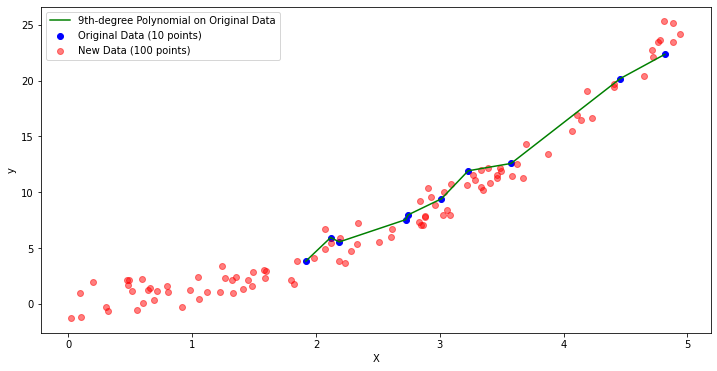

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the initial dataset with 10 data points
np.random.seed(0)
X_original = np.sort(5 * np.random.rand(10))
y_original = X_original**2 + np.random.randn(10)

# Create a PolynomialFeatures object to transform the data
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X_original.reshape(-1, 1))

# Use a Linear Regression model
model = LinearRegression()
model.fit(X_poly, y_original)

# Predict on the original data
y_pred_original = model.predict(X_poly)

# Create an additional 100 data points
X_additional = np.sort(5 * np.random.rand(100))
y_additional = X_additional**2 + np.random.randn(100)

# Transform the new data using PolynomialFeatures
X_poly_additional = poly_features.transform(X_additional.reshape(-1, 1))

# Predict on the new data
y_pred_additional = model.predict(X_poly_additional)

# Calculate MSE for both cases
mse_original = mean_squared_error(y_original, y_pred_original)
mse_additional = mean_squared_error(y_additional, y_pred_additional)

print("MSE on the original 10 data points:", mse_original)
print("MSE on the additional 100 data points:", mse_additional)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_original, y_original, label="Original Data (10 points)", color="blue")
plt.scatter(X_additional, y_additional, label="New Data (100 points)", color="red", alpha=0.5)
plt.plot(X_original, y_pred_original, label="9th-degree Polynomial on Original Data", color="green")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# EX2

Code from scratch
Implement hàm tính convolution
Input: X, W, stride, padding
Output: Y
Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch


In [9]:
import numpy as np

def convolution(X, W, stride=1, padding=0):
    # Get the dimensions of the input (X) and the kernel (W)
    H, W_in = X.shape
    H_k, W_k = W.shape
    
    # Calculate the output (Y) dimensions based on stride and padding
    H_out = (H - H_k + 2 * padding) // stride + 1
    W_out = (W_in - W_k + 2 * padding) // stride + 1
    
    # Initialize the output matrix Y
    Y = np.zeros((H_out, W_out))
    
    # Add padding to X if necessary
    if padding > 0:
        X_padded = np.pad(X, ((padding, padding), (padding, padding)), mode='constant')
    else:
        X_padded = X
    
    # Perform convolution
    for i in range(0, H_out, stride):
        for j in range(0, W_out, stride):
            X_slice = X_padded[i:i+H_k, j:j+W_k]
            Y[i//stride, j//stride] = np.sum(X_slice * W)
    
    return Y

# Test with synthetic data
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

W = np.array([[1, 0],
              [0, -1]])

stride = 1
padding = 0

Y = convolution(X, W, stride, padding)
print("Result of the custom implementation:")
print(Y)

Result of the custom implementation:
[[-4. -4.]
 [-4. -4.]]


In [10]:
import torch
import torch.nn.functional as F

# Convert matrices X and W to PyTorch tensors
X_torch = torch.tensor(X, dtype=torch.float32)
W_torch = torch.tensor(W, dtype=torch.float32)
X_torch = X_torch.unsqueeze(0).unsqueeze(0)  # Add batch_size and channels dimensions

# Use the conv2d function from PyTorch
Y_torch = F.conv2d(X_torch, W_torch.unsqueeze(0).unsqueeze(0), stride=stride, padding=padding)

print("Result from PyTorch:")
print(Y_torch.numpy()[0, 0])


Result from PyTorch:
[[-4. -4.]
 [-4. -4.]]


# EX3

Cho dataset CIFAR-10
Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch
Chỉnh learning rate, vẽ đồ thị loss tương ứng.
Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simplified VGG model
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10),  # CIFAR-10 has 10 classes
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Set up data transformations and data loading
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 64
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = VGG().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    epoch_loss = running_loss / len(trainloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

print('Finished Training')

# Evaluate the model on the test set
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0399
Epoch 2/10, Loss: 1.5997
Epoch 3/10, Loss: 1.3510
Epoch 4/10, Loss: 1.1614
Epoch 5/10, Loss: 1.0117
Epoch 6/10, Loss: 0.9121
Epoch 7/10, Loss: 0.8329
Epoch 8/10, Loss: 0.7663
Epoch 9/10, Loss: 0.7143
Epoch 10/10, Loss: 0.6733
Finished Training
Accuracy on the test set: 78.13%


# EX4

In [ ]:
Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

The first few blocks (layers) in the network recognize simple things like edges, colors, and basic shapes. These are like the basic building blocks of your data. As you add more blocks (go deeper into the network), they start recognizing more complex and abstract things. These might be combinations of basic shapes that form more complicated patterns or even entire objects. Deeper blocks look at information that's been put together by the previous blocks. It's like putting together puzzle pieces. The deeper you go, the more pieces you can connect to understand the bigger picture. Adding more blocks also gives the network more tools to work with. It's like having a bigger toolbox. You can build more complicated things with more tools.

So, the reason we increase depth in a neural network is to allow it to understand and work with increasingly complex and abstract information in the data. It's like adding more layers of understanding to solve more complex problems. However, you have to be careful not to make it too deep because that can cause other issues, like taking too long to train or making mistakes. So, finding the right depth is a balance.